<a href="https://colab.research.google.com/github/raihanhd12/PCVK_Genap_2023/blob/main/Minggu%208%20-%20UTS%20/%20uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2391]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2392]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
from scipy import stats as st
from scipy.stats import mode

In [2393]:
img= cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/noises/21.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.float32)

In [2394]:
def convolution2d(image, kernel, stride=1, padding=0, filter_type=''):
    # Membalik kernel agar sesuai dengan proses konvolusi
    kernel = np.flip(kernel, axis=None)

    # Menghitung tinggi dan lebar dari gambar hasil
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    output_height = (height + 2 * padding - kernel_height) // stride + 1
    output_width = (width + 2 * padding - kernel_width) // stride + 1

    # Melakukan padding pada gambar input jika nilai padding lebih besar dari 0
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Membuat gambar hasil dengan ukuran yang sama dengan gambar input
    output_image = np.zeros((output_height, output_width), dtype=image.dtype)

    # Melakukan konvolusi pada gambar
    for y in range(0, height-kernel_height+1, stride):
        for x in range(0, width-kernel_width+1, stride):
            roi = image[y:y+kernel_height, x:x+kernel_width]
            filtered_value = 0  # Mendifinisikan nilai_filtered sebelum kondisi if-else
            if filter_type == 'mean':
                # Menghitung rata-rata dari ROI
                sum_roi = np.sum(roi)
                filtered_value = sum_roi / (kernel_height * kernel_width)
            elif filter_type == 'median':
                # Menghitung median dari ROI
                values = roi.flatten()
                sorted_values = np.sort(values)
                mid = len(sorted_values) // 2
                if len(sorted_values) % 2 == 0:
                    filtered_value = (sorted_values[mid-1] + sorted_values[mid]) / 2
                else:
                    filtered_value = sorted_values[mid]
            elif filter_type == 'mode':
                # Menghitung modus dari ROI
                values, counts = np.unique(roi, return_counts=True)
                filtered_value = values[np.argmax(counts)]
            else:
                filtered_value = np.sum(roi * kernel)
            output_image[y//stride, x//stride] = filtered_value

    return output_image

In [2395]:
kernel = np.ones((3, 3))

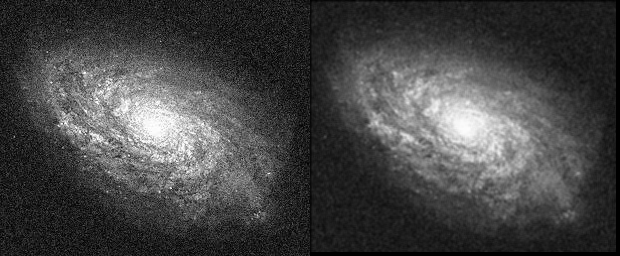

In [2396]:
# Apply different filters to the grayscale image
gray_filtered_mean = convolution2d(img_gray, kernel, stride=1, padding=2, filter_type='mean')

# Resize the filtered images to the same shape as the original image
gray_filtered_mean = cv.resize(gray_filtered_mean, (img_gray.shape[1], img_gray.shape[0]))

# Merge the filtered grayscale image with the original image
final_frame = cv.hconcat((img_gray, gray_filtered_mean))

# Display the original image and the filtered image side by

cv2_imshow(final_frame)

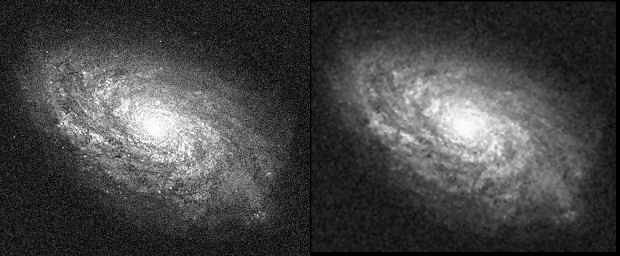

In [2397]:
# Apply different filters to the grayscale image
gray_filtered_median = convolution2d(img_gray, kernel, stride=1, padding=2, filter_type='median')

# Resize the filtered images to the same shape as the original image
gray_filtered_median = cv.resize(gray_filtered_median, (img_gray.shape[1], img_gray.shape[0]))

# Merge the filtered grayscale image with the original image
final_frame = cv.hconcat((img_gray, gray_filtered_median))

# Display the original image and the filtered image side by

cv2_imshow(final_frame)

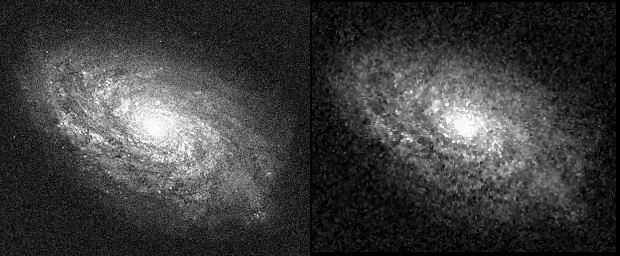

In [2398]:
# Apply different filters to the grayscale image
gray_filtered_modus = convolution2d(img_gray, kernel, stride=1, padding=2, filter_type='mode')

# Resize the filtered images to the same shape as the original image
gray_filtered_modus = cv.resize(gray_filtered_modus, (img_gray.shape[1], img_gray.shape[0]))

# Merge the filtered grayscale image with the original image
final_frame = cv.hconcat((img_gray, gray_filtered_modus))

# Display the original image and the filtered image side by

cv2_imshow(final_frame)

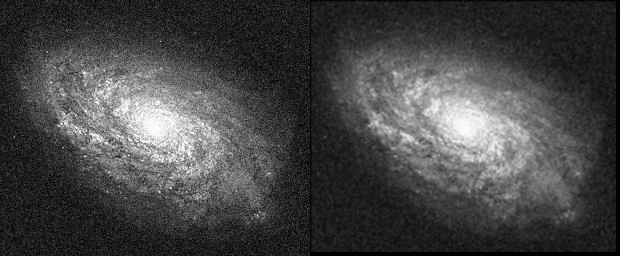

In [2399]:
# Low pass filter
lowpass_kernel = np.array([[1, 1, 1],
                           [1, 4, 1],
                           [1, 1, 1]]) / 12

# Apply convolution with low pass kernel and stride=1, padding=2
lowpass_img = convolution2d(img_gray, lowpass_kernel, stride=1, padding= 2)

# Convert the output image to uint8 and resize to match the dimensions of img_gray
lowpass_img = cv.resize(lowpass_img, img_gray.shape[::-1])

# Display original and low pass filtered images side by side
final_frame = np.hstack((img_gray, lowpass_img))
cv2_imshow(final_frame)

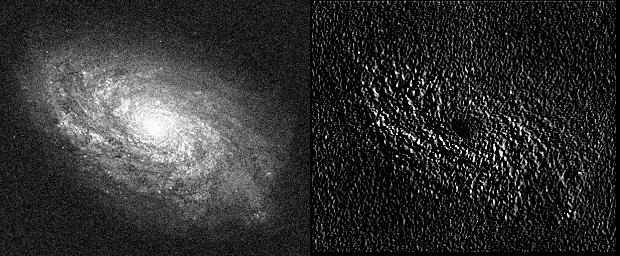

In [2400]:
# High pass kernel
highpass_kernel = np.array([[-1, 0, 1],
                            [-1, 0, 3],
                            [-3, 0, 1]])

# Apply convolution with high pass kernel and stride=1, padding=2
highpass_img = convolution2d(img_gray, highpass_kernel, stride=1, padding=2)

# Convert the output image to uint8 and resize to match the dimensions of img_gray
highpass_img = cv.resize(highpass_img, img_gray.shape[::-1])

# Display original and high pass filtered images side by side
final_frame = np.hstack((img_gray, highpass_img))
cv2_imshow(final_frame)